In [1]:
import pandas as pd
import sklearn as sk
import re


# DATASET - trainDataXV.csv
- This is a small dataset to test if the code works
- We will initially implement decision tree and logestic regression to the dataset to make sure things are working
- We then will implement the cross-validation feature and data handlers

In [2]:
# Import train and test dataset
data_1_train = pd.read_csv("ATNT50/trainDataXY.txt", header=None)
data_1_test = pd.read_csv("ATNT50/testDataXY.txt", header=None)

# The data is in a form where the headers of each column is the class of the data, and the entire data is a column
# We need to transpose this to make sure that each data is a row
transposed_data_1_train = data_1_train.T
transposed_data_1_test = data_1_test.T

# Seperating Class y and Attributes X.
X = transposed_data_1_train.iloc[:, 1:]
y = transposed_data_1_train.iloc[:, 0]

# Attribute X for the testDataXY.csv
X_test = transposed_data_1_test.iloc[:, 1:]
y_true = transposed_data_1_test.iloc[:, 0]

# Classifiers
1. The expected classes are already given for the test data y_true = 1,4,5,2,3
2. Decision tree classifier is implemented with result 1,3,5,2,3 - which is a 80% accuracy
3. Logistic Regressor is implemented with result 1,4,5,2,3 - which is a 100% accuracy

In [3]:
# transposed_data_1_train[]
x = transposed_data_1_train[0].isin([1,2])
# transposed_data_1_train.mean(axis=0)
x
transposed_data_1_train[x]

,0,1,2,3,4,5,6,7,8,9,...,635,636,637,638,639,640,641,642,643,644
0,1,47,47,49,51,55,48,45,45,48,...,41,44,42,41,41,43,45,45,46,46
1,1,64,65,69,78,79,80,95,93,85,...,36,36,37,38,38,38,37,36,35,34
2,1,50,58,55,52,53,59,56,47,50,...,44,44,43,42,42,40,39,37,33,30
3,1,39,30,28,46,65,81,86,86,83,...,158,147,127,112,101,96,89,77,66,60
4,1,66,39,56,56,52,50,38,35,37,...,49,45,42,43,44,46,44,42,41,38
5,1,51,48,64,74,102,120,137,144,142,...,130,132,129,130,134,145,153,156,159,159
6,1,46,47,50,50,55,63,60,60,62,...,179,115,38,38,37,36,36,35,36,36
7,1,37,35,30,28,28,26,27,26,25,...,48,47,44,43,44,45,43,42,40,39
8,1,43,42,41,38,36,31,27,27,29,...,190,178,69,44,46,44,43,42,43,42
9,2,37,37,37,38,39,39,39,39,57,...,31,26,28,28,27,28,27,27,21,60


In [4]:
from sklearn.metrics import accuracy_score

In [5]:
# Expected Class
print("Expected Class: ")
print(list(y_true))
print("\n")


# Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X, y)
y_predict_dec = clf.predict(X_test)
print("Decision Tree Prediction")
print(y_predict_dec)
print("Accuracy")
print(accuracy_score(y_true, y_predict_dec))
print("\n")

# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=107).fit(X, y)
y_predict_log = clf.predict(X_test)
print("Logistic Regression Classification")
print(y_predict_log)
print("Accuracy")
print(accuracy_score(y_true, y_predict_log))


Expected Class: 
[1, 4, 5, 2, 3]


Decision Tree Prediction
[1 3 5 2 3]
Accuracy
0.8


Logistic Regression Classification
[1 4 5 2 3]
Accuracy
1.0


# Add new Dataset
- Adding class of 26 classes and 39 data points for each class

In [6]:
# Total 40 classes. each class has 10 images. Total 40*10=400 images
# 1st row is cluster labels. 
# 2nd-end rows: each column is a feature vectors (vector length=28x23).
face_train = pd.read_csv("ATNTFaceImages400.txt", header=None)

# Hand-written-26-letter
# 1st row is cluster labels. 
# 2nd-end rows: each column is a feature vectors (vector length=20x16).
# Total 26 classes. each class has 39 images. Total 26*39=1014 images.
handw_test = pd.read_csv("HandWrittenLetters.txt", header=None)

# The data is in a form where the headers of each column is the class of the data, and the entire data is a column
# We need to transpose this to make sure that each data is a row
face_t = face_train.T
handw_t = handw_test.T


In [7]:
face_t[face_t[0].isin([1])]

,0,1,2,3,4,5,6,7,8,9,...,635,636,637,638,639,640,641,642,643,644
0,1,47,47,49,51,55,48,45,45,48,...,41,44,42,41,41,43,45,45,46,46
1,1,64,65,69,78,79,80,95,93,85,...,36,36,37,38,38,38,37,36,35,34
2,1,50,58,55,52,53,59,56,47,50,...,44,44,43,42,42,40,39,37,33,30
3,1,39,30,28,46,65,81,86,86,83,...,158,147,127,112,101,96,89,77,66,60
4,1,66,39,56,56,52,50,38,35,37,...,49,45,42,43,44,46,44,42,41,38
5,1,51,48,64,74,102,120,137,144,142,...,130,132,129,130,134,145,153,156,159,159
6,1,46,47,50,50,55,63,60,60,62,...,179,115,38,38,37,36,36,35,36,36
7,1,37,35,30,28,28,26,27,26,25,...,48,47,44,43,44,45,43,42,40,39
8,1,43,42,41,38,36,31,27,27,29,...,190,178,69,44,46,44,43,42,43,42
9,1,33,34,28,32,28,26,27,28,31,...,48,50,50,50,51,49,46,45,39,37


# Data Handling 
### Idea of handling data
1. Take n% of the data for testing
2. Take 1-(n%) of the data for training
---

- We now take n = 10%? 

In [8]:
# Seperating Class y and Attributes X.
# 

# Number of rows in test
face_rows = len(face_t)
handw_rows = len(handw_t)

# FACE
# Face_Test and train split
face_t_test = face_t.iloc[:int(face_rows/10)]
face_t_train = face_t.iloc[int(face_rows/10): face_rows]

# Face Seperating Class y and Attributes X.
# For test
face_test_X = face_t_test.iloc[:, 1:]
face_test_y = face_t_test.iloc[:, 0]
# For train
face_train_X = face_t_train.iloc[:, 1:]
face_train_y = face_t_train.iloc[:, 0]


# HANDWRITING
# Handwriting_Test and train split
handw_t_test = handw_t.iloc[:int(handw_rows/10)]
handw_t_train = handw_t.iloc[int(handw_rows/10): handw_rows]


In [9]:

# Handwriting Seperating Class y and Attributes X.
# for test
handw_test_X = handw_t_test.iloc[:, 1:]
handw_test_y = handw_t_test.iloc[:, 0]
# For train
handw_train_X = handw_t_train.iloc[:, 1:]
handw_train_y = handw_t_train.iloc[:, 0]

In [10]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
def LogReg(X,y,X_test,y_test):
    clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=500).fit(X, y)
    y_pred = clf.predict(X_test)
    return y_pred,accuracy_score(y_test, y_pred)

In [11]:
# SVM Classifier
from sklearn.svm import SVC
def SVClassifier(X,y,X_test,y_test):
    clf = SVC(gamma='auto')
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    return y_pred,accuracy_score(y_test, y_pred)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
def knn(X,y,X_test,y_test):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X, y)
    y_pred = neigh.predict(X_test)
    return y_pred, accuracy_score(y_test, y_pred)

In [13]:
def pickDataClass(filename, class_ids):
    class_ids = letter_2_digit_convert(class_ids)
    dataset = pd.read_csv(filename, header=None)
    dataset_t = dataset.T
    return dataset_t.loc[dataset_t[0].isin(class_ids)]

In [14]:
def letter_2_digit_convert(ids):
    return [ord(c)-97+1 for c in ids.lower()]

In [15]:
def splitData2TestTrain(dataset, number_per_class,  test_instances):
    classes = list(dataset.iloc[:,0].unique())
    columns = dataset.columns.stop
    train = pd.DataFrame([], columns=[i for i in range(0,columns)])
    test = pd.DataFrame([], columns=[i for i in range(0,columns)])
    
#     Split test_inst in number_per_class
    
    for cls in classes:
        class_data = dataset[dataset[0]==cls]
#         print(test_instances)
#         print(class_data[test_instances[0]:test_instances[1]])
        test = test.append(class_data[test_instances[0]:test_instances[1]])
        train = train.append(class_data[0:test_instances[0]])
        train = train.append(class_data[test_instances[1]:number_per_class])
#         print(test)

#     split X and yt
    test_attr = test.iloc[:, 1:columns]
    test_class = test.iloc[:, 0]
    test_class=test_class.astype('int')
    train_attr = train.iloc[:, 1:columns]
    train_class = train.iloc[:, 0]
    train_class=train_class.astype('int')
    return train_attr, train_class, test_attr, test_class

In [16]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [17]:
# QUESTION A

result = {}
filename = "HandWrittenLetters.txt"
classes = "ABCDEZ"
dataset = pickDataClass(filename, classes)
number_per_class=39
k=2
test_instances="30:39"
test_instances=[int(i) for i in test_instances.split(':')]
result = {}
train_attr, train_class, test_attr, test_class = splitData2TestTrain(dataset,number_per_class,test_instances)

ypred, accuracy = SVClassifier(train_attr,train_class,test_attr,test_class)
result["svm"]={
    "ypred": ypred,
    "accuracy": accuracy
}

ypred, accuracy = LogReg(train_attr,train_class,test_attr,test_class)
result["lin"]={
    "ypred": ypred,
    "accuracy": accuracy
}

ypred, accuracy = knn(train_attr,train_class,test_attr,test_class)
result["knn"]={
    "ypred": ypred,
    "accuracy": accuracy
}

print("Question A RESULT: ")
print("SVM")
print(result["svm"])
print("Logistic Regression")
print(result["lin"])
print("KNN Regression")
print(result["knn"])

Question A RESULT: 
SVM
{'ypred': array([ 1,  1,  1,  1,  1,  1,  1,  2,  1,  2,  2,  2,  1,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  5,  5,  5,  5,  5,  3,  5,  3,  5, 26, 26, 26, 26, 26,  4,
       26, 26, 26]), 'accuracy': 0.9074074074074074}
Logistic Regression
{'ypred': array([ 1,  1,  1,  1,  1,  1,  1,  2,  1,  2,  2,  2,  1,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  5,  5,  5,  5,  5,  2,  5,  3,  5, 26, 26, 26, 26, 26,  4,
       26, 26, 26]), 'accuracy': 0.9074074074074074}
KNN Regression
{'ypred': array([ 1,  2,  1,  1,  2,  1,  1,  2,  1,  1,  2,  2,  1,  2,  2,  5, 26,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
        1,  4,  5,  5,  5,  5,  5,  3,  5,  3,  5, 26, 26, 26, 26, 26, 26,
       26, 26, 26]), 'accuracy': 0.8148148148148148}


In [18]:
# QUESTION B
from sklearn.model_selection import StratifiedKFold

result = {}
filename = "ATNTFaceImages400.txt"
dataset = pd.read_csv(filename, header=None)
dataset = dataset.T
folds = StratifiedKFold(n_splits=5)

log = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=500)
knn = KNeighborsClassifier(n_neighbors=3)
svm = SVC(gamma='auto')


score_knn=[]
score_svm=[]
score_log=[]

X,y = dataset.iloc[:,1:], dataset.iloc[:, 0]
for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
    score_knn.append(get_score(log, X_train, X_test, y_train, y_test))  
    score_svm.append(get_score(svm, X_train, X_test, y_train, y_test))
    score_log.append(get_score(knn, X_train, X_test, y_train, y_test))

print("KNN 5 fold accuracies")
print(score_knn)
print("MEAN: ", sum(score_knn)/len(score_knn) )
print("SVM 5 fold accuracies")
print(score_svm)
print("MEAN: ", sum(score_svm)/len(score_svm) )
print("LOGISTIC REGRESSION 5 fold accuracies")
print(score_log)
print("MEAN: ", sum(score_log)/len(score_log) )


KNN 5 fold accuracies
[0.9875, 1.0, 1.0, 0.975, 0.9625]
MEAN:  0.985
SVM 5 fold accuracies
[0.75, 0.7875, 0.7125, 0.5875, 0.65]
MEAN:  0.6975
LOGISTIC REGRESSION 5 fold accuracies
[0.9125, 0.925, 0.9625, 0.9875, 0.9375]
MEAN:  0.945


In [19]:
import math
class Centroid:
    def fit(self, X,y):
        self.meanX = pd.DataFrame([], columns= X.columns)
        classes = list(y.unique())
        self.meanY = pd.Series(classes)
        for cls in classes:
            self.meanX=self.meanX.append(X[y==cls].mean(),ignore_index=True)
            
    def predict(self, X_test):
        pred_list = []
        for ri,row in X_test.iterrows():
            min_dist = float('inf')
            min_ind = -1
            for mean_index, mean_val in self.meanX.iterrows():
                dist = self.euclidean_distance(mean_val, row)
                if(dist<min_dist):
                    min_dist = dist
                    min_ind = mean_index
            pred_list.append(self.meanY[min_ind])
        return pred_list

    # Calculate the Euclidean distance between two vectors
    def euclidean_distance(self, row1, row2):
        distance = 0.0
        for i in range(1,len(row1)):
            distance += (row1[i] - row2[i])**2
        return math.sqrt(distance)


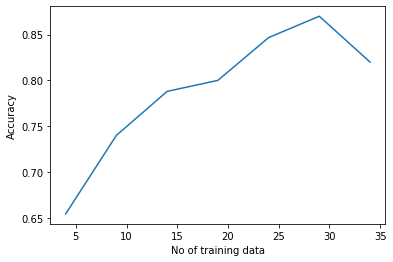

In [20]:
# QUESTION C

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

result = {}
filename = "HandWrittenLetters.txt"
classes = "ABCDEFGHIJ"
dataset = pickDataClass(filename, classes)
number_per_class=39
test_instances=[[0,5], [0,10], [0,15], [0,20], [0,25], [0,30], [0,35]]
accuracies = []
for test in test_instances:
    train_attr, train_class, test_attr, test_class = splitData2TestTrain(dataset,number_per_class,test)
    centroid = Centroid()
    centroid.fit(train_attr, train_class)
    y_pred = centroid.predict(test_attr)
    accuracies.append(accuracy_score(test_class, y_pred))

train_leng = [number_per_class-i[1] for i in test_instances]
plt.plot(train_leng, accuracies)
plt.ylabel('Accuracy')
plt.xlabel('No of training data')
plt.show()

In [ ]:
# QUESTION D

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

result = {}
filename = "HandWrittenLetters.txt"
classes = "KLMNOPQRST"
dataset = pickDataClass(filename, classes)
number_per_class=39
test_instances=[[0,5], [0,10], [0,15], [0,20], [0,25], [0,30], [0,35]]
accuracies = []
for test in test_instances:
    train_attr, train_class, test_attr, test_class = splitData2TestTrain(dataset,number_per_class,test)
    centroid = Centroid()
    centroid.fit(train_attr, train_class)
    y_pred = centroid.predict(test_attr)
    accuracies.append(accuracy_score(test_class, y_pred))

train_leng = [number_per_class-i[1] for i in test_instances]
plt.plot(train_leng, accuracies)
plt.ylabel('Accuracy')
plt.xlabel('No of training data')
plt.show()

In [ ]:
train_attr, train_class, test_attr, test_class = splitData2TestTrain(dataset, 39,  i)
SVClassifier(train_attr,train_class,test_attr,test_class)
LogReg(train_attr,train_class,test_attr,test_class)

In [ ]:
import numpy as np
from sklearn.model_selection import GroupKFold
X = np.array([[1, 2], [3, 4], [2, 2], [4, 3]])
y = np.array([1, 1, 2, 2])
kf = GroupKFold(n_splits=2)
kf.get_n_splits(X)
groups = np.array([0, 0, 2, 2])
print(kf)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]